In [230]:
import pyrosetta 
from pyrosetta import *
init()

PyRosetta-4 2020 [Rosetta PyRosetta4.conda.mac.python37.Release 2020.02+release.22ef835b4a2647af94fcd6421a85720f07eddf12 2020-01-05T17:31:56] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.mac.python37.Release r242 2020.02+release.22ef835b4a2 22ef835b4a2647af94fcd6421a85720f07eddf12 http://www.pyrosetta.org 2020-01-05T17:31:56
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /Users/sujiaqi/miniconda3/envs/py3/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=1807194022 seed_offset=0 real_seed=1807194022 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=1807194022 RG_type=mt19937


In [231]:
#pose，from sequence 'AAAAAAAAA'
pose = pose_from_sequence('A'*10)
test_pose=pose

In [232]:
from pyrosetta import PyMOLMover
#pymol show
pmm = PyMOLMover()
pmm.apply(pose)

In [219]:
len(pose.sequence())

10

In [233]:
#第五个AA信息
print(pose.residue(5))

Residue 5: ALA (ALA, A):
Base: ALA
 Properties: POLYMER PROTEIN CANONICAL_AA ALIPHATIC METALBINDING ALPHA_AA L_AA
 Variant types:
 Main-chain atoms:  N    CA   C  
 Backbone atoms:    N    CA   C    O    H    HA 
 Side-chain atoms:  CB  1HB  2HB  3HB 
Atom Coordinates:
   N  : 12.404, 7.64594, 3.32143e-16
   CA : 13.862, 7.64594, 1.28484e-15
   C  : 14.4129, 9.06611, 1.39319e-16
   O  : 13.655, 10.0362, -1.38422e-15
   CB : 14.3918, 6.87318, -1.19909
   H  : 11.9121, 8.52802, -3.16607e-16
   HA : 14.2007, 7.15631, 0.91315
  1HB : 15.4817, 6.88219, -1.18511
  2HB : 14.0369, 5.8435, -1.15412
  3HB : 14.0373, 7.33896, -2.11716
Mirrored relative to coordinates in ResidueType: FALSE



In [234]:
#score(0)
scr=get_score_function(0)

core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: cen_std


In [223]:
#打分
scr(test_pose)

20.3253531

In [235]:
#忽略侧链，侧链质心
switch = SwitchResidueTypeSetMover("centroid")

In [236]:
switch.apply(test_pose)
print(test_pose.residue(5))

Residue 5: ALA (ALA, A):
Base: ALA
 Properties: POLYMER PROTEIN CANONICAL_AA ALIPHATIC ALPHA_AA L_AA
 Variant types:
 Main-chain atoms:  N    CA   C  
 Backbone atoms:    N    CA   C    O    H  
 Side-chain atoms:  CB   CEN
Atom Coordinates:
   N  : 12.404, 7.64594, 3.32143e-16
   CA : 13.862, 7.64594, 1.28484e-15
   C  : 14.4129, 9.06611, 1.39319e-16
   O  : 13.655, 10.0362, -1.38422e-15
   CB : 14.3918, 6.8684, -1.196
   CEN: 14.3919, 6.86928, -1.19534
   H  : 11.9121, 8.52802, -3.16607e-16
Mirrored relative to coordinates in ResidueType: FALSE



In [237]:
import random

In [238]:
#循环5000次，打分函数为scr=get_score_function(0)
#随机某一个氨基酸
#改变phi与psi
#若打分低于上一个，接受；若高于，不接受
scr=get_score_function(0)
scr(test_pose)
score_list=[scr(test_pose)]
pose_list=[test_pose]
for i in range(5000):
    
    a=random.randint(1,10)
    tmp_pose=pose_list[-1]
    x=tmp_pose.phi(a)
    y=tmp_pose.psi(a)
    
    mean_num=(x+y)/2
    new_x=random.gauss((x+y)/2,25)
    new_y=random.gauss((x+y)/2,25)
    
    tmp_pose.set_phi(a, new_x)
    tmp_pose.set_psi(a,new_x)
    
    fin_score=scr(tmp_pose)
    
    if scr(test_pose) < score_list[-1]:
        score_list.append(scr(test_pose))
        pose_list.append(test_pose)
        print(scr(test_pose))
        pmm.reinitialize_for_new_input()
        pmm.apply(tmp_pose)
        pmm.send_energy(tmp_pose)
    

core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: cen_std
20.25460263
20.15966382
19.55362599131596
19.232434483424896
18.979913887231877
17.301794108241097
16.941903435239702
16.662825027174154
16.124242762242204
15.41213811288939
14.868935623496704
14.7198485177614
14.4664380149136
14.346618834011391
12.734722504140853


Text(0, 0.5, 'score')

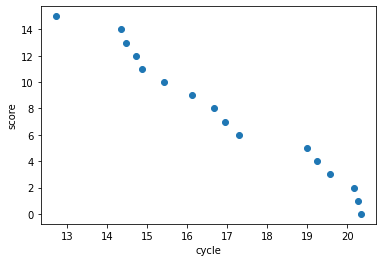

In [239]:
#画图，打分，接受的循环
import matplotlib.pyplot as plt
plt.scatter(score_list, range(len(pose_list)))
plt.xlabel('cycle')
plt.ylabel('score')

In [241]:
#展示打分最低的pose
scr.show(pose_list[-1])

core.scoring.ScoreFunction: {0} 
------------------------------------------------------------
 Scores                       Weight   Raw Score Wghtd.Score
------------------------------------------------------------
 vdw                          1.000       2.495       2.495
 pair                         1.000       0.000       0.000
 env                          1.000      14.883      14.883
 cbeta                        1.000       3.981       3.981
---------------------------------------------------
 Total weighted score:                       21.359


In [139]:
print(test_pose)

PDB file name: AAAAAAAA
Total residues: 10
Sequence: AAAAAAAAAA
Fold tree:
FOLD_TREE  EDGE 1 10 -1 
